In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV
df = pd.read_csv("Resources/cleaned_alzheimers_disease_data.csv")
df.head()      

,Unnamed: 0,PatientID,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,FunctionalAssessment,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,4751,73,Male,Caucasian,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,6.518877,0,0,0,0,0,1,0,0
1,1,4752,89,Male,Caucasian,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,7.118696,0,0,0,0,0,0,1,0
2,2,4753,73,Male,Other,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,5.895077,0,0,0,1,0,1,0,0
3,3,4754,74,Female,Caucasian,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,8.965106,0,1,0,0,0,0,0,0
4,4,4755,89,Male,Caucasian,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,6.045039,0,0,0,0,1,1,0,0


In [3]:
print(df.dtypes)

Unnamed: 0                     int64
PatientID                      int64
Age                            int64
Gender                        object
Ethnicity                     object
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
Confusion                      int64
Disorientation                 int64
PersonalityChanges             int64
DifficultyCompletingTasks      int64
Forgetfulness                  int64
Diagnosis                      int64
dtype: object


In [4]:
df.columns

Index(['Unnamed: 0', 'PatientID', 'Age', 'Gender', 'Ethnicity', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems',
       'Confusion', 'Disorientation', 'PersonalityChanges',
       'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode 'Gender' column (or any binary categorical column)
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])


In [6]:
num_cols = ['PatientID', 'Age', 'Gender', 'Ethnicity', 'BMI', 
            'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 
            'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 
            'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 
            'Hypertension', 'FunctionalAssessment', 'MemoryComplaints', 
            'BehavioralProblems', 'Confusion', 'Disorientation', 
            'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


In [7]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Diagnosis'])  # Exclude 'Diagnosis' from features
y = df['Diagnosis']  # Target variable

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data only and then transform both the train and test sets
X_train_scaled = scaler.fit_transform(X_train[num_cols])  # Fit on train and transform train
X_test_scaled = scaler.transform(X_test[num_cols])        # Transform test with the same scaler

In [10]:
# Convert scaled arrays back to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)

LinearRegression

Logistic Regression Accuracy: 0.6744186046511628
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.76       277
           1       0.56      0.42      0.48       153

    accuracy                           0.67       430
   macro avg       0.64      0.62      0.62       430
weighted avg       0.66      0.67      0.66       430



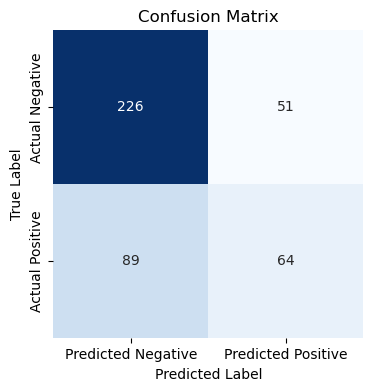

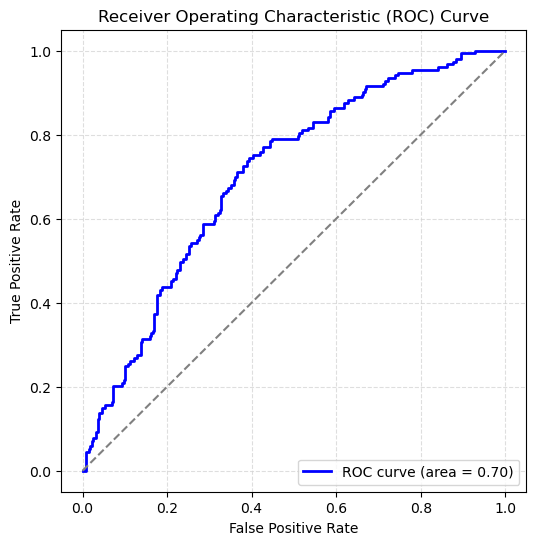

In [11]:
# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

#Generate the predictions and evaluate the confusion matrix
test_cf = confusion_matrix(y_test, y_pred_logreg)

# Visualize the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 2: Calculate the ROC curve and AUC
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
test_auc = roc_auc_score(y_test, y_pred_prob)

# Step 3: Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")
plt.show()

Decision Trees

Decision Tree Accuracy: 0.6883720930232559
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       277
           1       0.56      0.57      0.56       153

    accuracy                           0.69       430
   macro avg       0.66      0.66      0.66       430
weighted avg       0.69      0.69      0.69       430



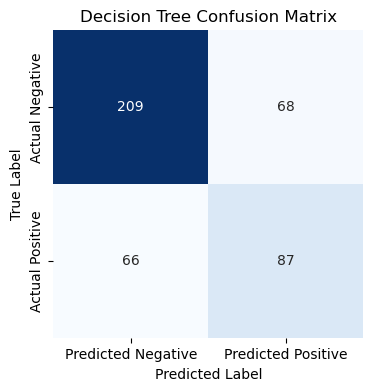

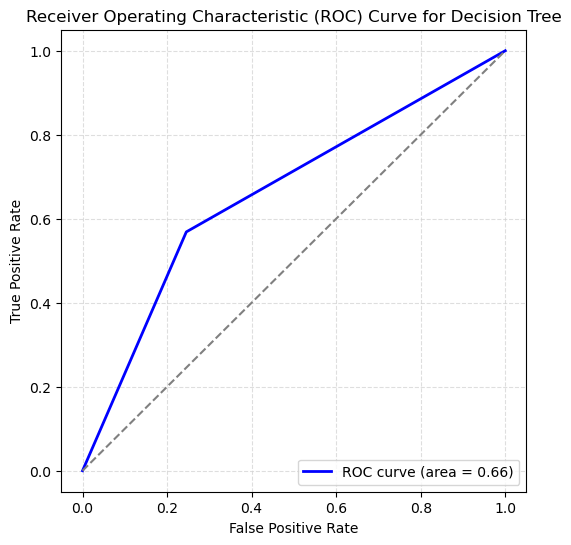

In [12]:
# Initialize and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

#Generate the Confusion Matrix
test_cf_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf_dt, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 2: Calculate the ROC curve and AUC
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
test_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

# Step 3: Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC curve (area = {test_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")
plt.show()

Random Forest

Random Forest Accuracy: 0.7116279069767442
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       277
           1       0.61      0.53      0.57       153

    accuracy                           0.71       430
   macro avg       0.68      0.67      0.68       430
weighted avg       0.70      0.71      0.71       430



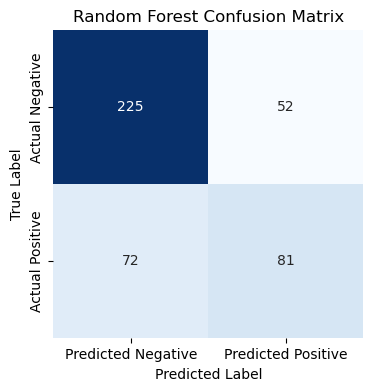

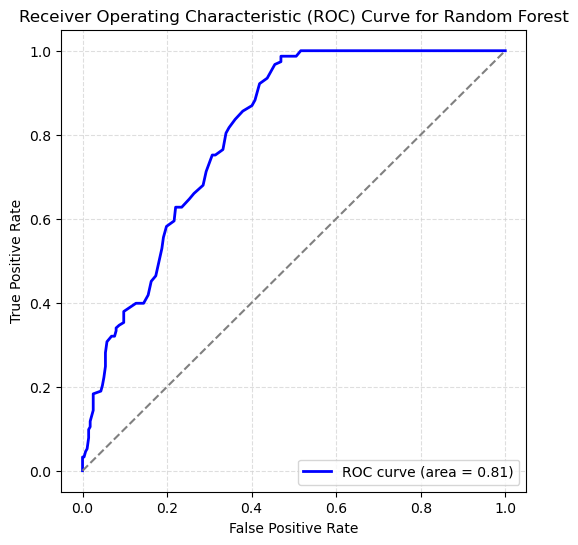

In [13]:
# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

#Generate the Confusion Matrix
test_cf_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 2: Calculate the ROC curve and AUC
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
test_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Step 3: Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {test_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")
plt.show()

In [14]:
from xgboost import XGBClassifier

# Create and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [15]:
# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

NameError: name 'xgb_model' is not defined

In [16]:
#visualization
#Generate the Confusion Matrix
test_cf_xgb = confusion_matrix(y_test, y_pred_xgb)
# Visualize the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Step 2: Calculate the ROC curve and AUC
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
test_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
# Step 3: Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC curve (area = {test_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")
plt.show()

NameError: name 'y_pred_xgb' is not defined